# Visualizing loan applicants data

In [1]:
## Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [147]:
## Importing the different datasets
pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',50)
current_app_df = pd.read_csv('application_data.csv')
previous_app_df = pd.read_csv('previous_application.csv')
current_app_df.nunique().sort_values(ascending=False)
## Convert datasets into target variables

## Getting and comparing top 10 correlated variables

# ## Get correlations .corr() , 
# corr_df.columns=['A','B','Correlations'] , 
# corr_df = corr().unstack().reset_index() 
# corr = corr.where(np.triu(np.ones(corr.shape),k=1)).astype(np.bool)
# corr_df.dropna(subset=['Correlation'],inplace=True)
# corr_df['Correlation'] = corr_df['Correlation'].round(2)
# corr_df['Correlation'] = corr_df['Correlation'].abs(2)

SK_ID_CURR                      307511
EXT_SOURCE_2                    119831
EXT_SOURCE_1                    114584
DAYS_BIRTH                       17460
DAYS_REGISTRATION                15688
AMT_ANNUITY                      13672
DAYS_EMPLOYED                    12574
DAYS_ID_PUBLISH                   6168
AMT_CREDIT                        5603
LIVINGAREA_MODE                   5301
LIVINGAREA_MEDI                   5281
LIVINGAREA_AVG                    5199
TOTALAREA_MODE                    5116
BASEMENTAREA_MODE                 3841
BASEMENTAREA_AVG                  3780
DAYS_LAST_PHONE_CHANGE            3773
BASEMENTAREA_MEDI                 3772
LANDAREA_MODE                     3563
LANDAREA_MEDI                     3560
LANDAREA_AVG                      3527
NONLIVINGAREA_MODE                3327
NONLIVINGAREA_MEDI                3323
NONLIVINGAREA_AVG                 3290
COMMONAREA_MEDI                   3202
COMMONAREA_AVG                    3181
COMMONAREA_MODE          

In [148]:
current_app_df.nunique().sort_values(ascending=True) <= 5

LIVE_CITY_NOT_WORK_CITY          True
FLAG_DOCUMENT_18                 True
FLAG_DOCUMENT_14                 True
FLAG_MOBIL                       True
FLAG_EMP_PHONE                   True
FLAG_WORK_PHONE                  True
FLAG_CONT_MOBILE                 True
FLAG_PHONE                       True
FLAG_EMAIL                       True
FLAG_DOCUMENT_15                 True
FLAG_DOCUMENT_16                 True
FLAG_DOCUMENT_17                 True
EMERGENCYSTATE_MODE              True
REG_CITY_NOT_WORK_CITY           True
REG_CITY_NOT_LIVE_CITY           True
REG_REGION_NOT_LIVE_REGION       True
FLAG_DOCUMENT_19                 True
REG_REGION_NOT_WORK_REGION       True
FLAG_DOCUMENT_20                 True
FLAG_DOCUMENT_13                 True
TARGET                           True
NAME_CONTRACT_TYPE               True
FLAG_DOCUMENT_2                  True
FLAG_OWN_CAR                     True
FLAG_OWN_REALTY                  True
FLAG_DOCUMENT_3                  True
FLAG_DOCUMEN

In [142]:
## Significant columns chart
# plt.figure(figsize=(16,8))
# significant_cols = current_app_df.columns.to_list()[2:17]
# total_cols = len(significant_cols)
# for i in enumerate(significant_cols):
#     plt.subplot(total_cols // 3,3,i[0] + 1)
#     sns.countplot(x=i[1],hue='TARGET',data=current_app_df)

Error in callback <function flush_figures at 0x00000281EECAF670> (for post_execute):


KeyboardInterrupt: 

In [126]:
# Percentage of target variables
100  * current_app_df['TARGET'].value_counts(normalize=True)

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

In [124]:

## Splitting data
cur_df_1 =  current_app_df[current_app_df['TARGET'] == 1]
cur_df_0 = current_app_df[current_app_df['TARGET'] == 0]

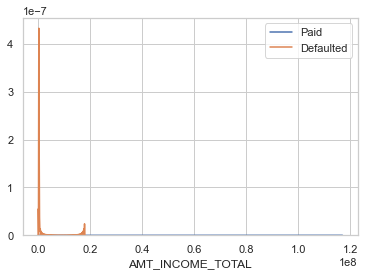

In [127]:
# Continuous variable default / normal
sns.distplot(cur_df_1['AMT_INCOME_TOTAL'],hist=False,label='Paid')
sns.distplot(cur_df_0['AMT_INCOME_TOTAL'],hist=False,label='Defaulted')
plt.show()

## Understanding which variable are significant

In [3]:
## Getting all columns of current applicants
curr_app_significant_cols = current_app_df.columns.to_list()
## Getting all columns of previous applicants
prev_app_sig_cols = previous_app_df.columns.to_list()

> Going by the assumption that Income will be the primary variable which affects loan applicants ability to repay their loan, some analysis on the same needs to be done


In [4]:
current_app_df['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

### Understanding Income variable in current and previous applicants

### Understanding income distributions

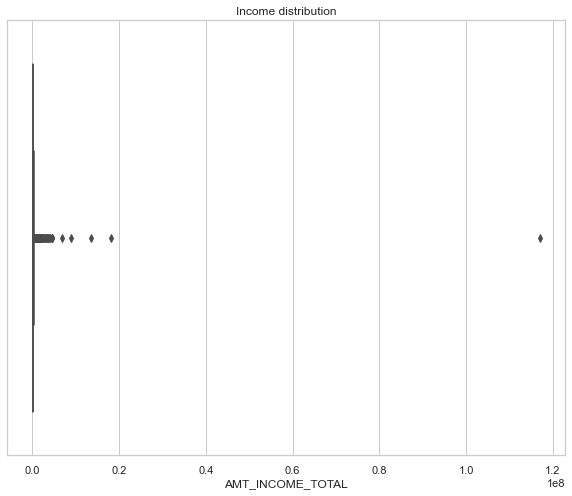

In [84]:
## Current applicants
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
sns.boxplot(x=current_app_df['AMT_INCOME_TOTAL'].astype('int'))
plt.title("Income distribution")
plt.show()


> As we can see that apart from a few outliers most of the distribution is concentrated around the middle of the values.
Boxplot is not a good indicator of income distribution (most of the variables seem to lie in one center of the distribution), but lets try to analyse the variable and see if it helps.

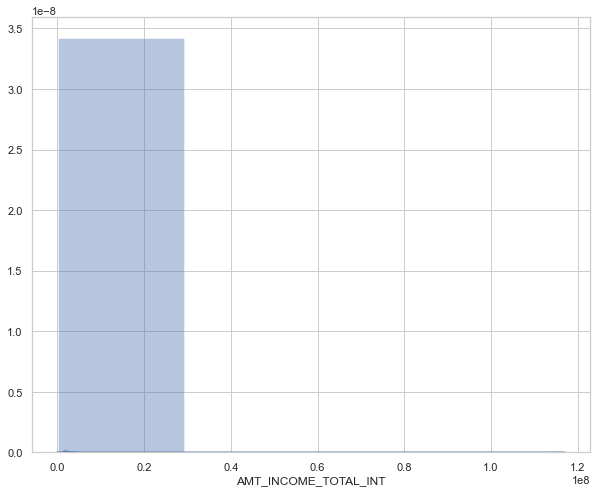

In [6]:
## Histogram of total income
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
current_app_df['AMT_INCOME_TOTAL_INT'] = current_app_df['AMT_INCOME_TOTAL'].astype('int')
sns.distplot(current_app_df['AMT_INCOME_TOTAL_INT'],bins=4,)
plt.show()

> Histogram also has difficulty in representing the data even in integers, we should convert this data into categories and bins to represent the same before we use a plot for it

**Converting the income distribution to categories, let's see what results we get**

In [131]:
# Converting to integer
current_app_df['AMT_INCOME_TOTAL_INT'] = current_app_df['AMT_INCOME_TOTAL'].astype(int)
# Understanding the range of data and where most of the data lies
current_app_df['AMT_INCOME_TOTAL_INT'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL_INT, dtype: float64

In [132]:
# Our data lies in this range , lets define bins and categories for the same
bins = [25000,75000,125000,175000,225000,275000,325000,375000,np.inf]
categories = ['25K-75K','75K-125K','125K-175K','175K-225K','225K-275K','275K-325K','325K-375k','375K+']
# Introducing a new variable income_range which will help analyse ranges of income where people fall in.
current_app_df['INCOME_RANGE'] = pd.cut(current_app_df['AMT_INCOME_TOTAL_INT'],bins,labels=categories)

In [10]:
current_app_df['INCOME_RANGE'].value_counts(normalize=True)


75K-125K     0.271558
125K-175K    0.268455
175K-225K    0.229068
25K-75K      0.077695
225K-275K    0.065276
275K-325K    0.035960
375K+        0.030334
325K-375k    0.021655
Name: INCOME_RANGE, dtype: float64

### Understanding the distributions of income in the dataset

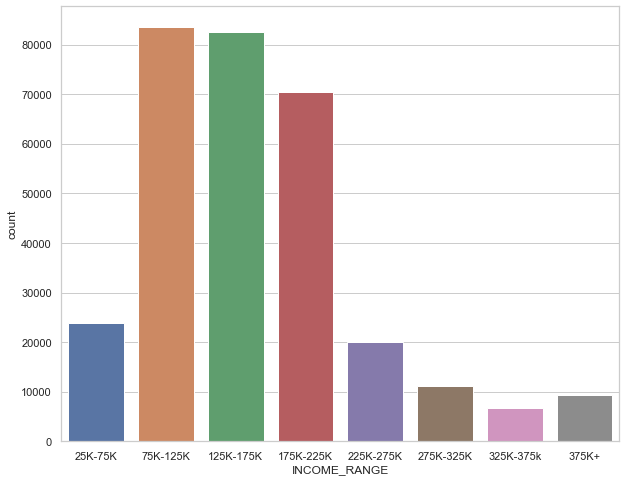

In [11]:
## Histogram of categorical incomes
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
sns.countplot(current_app_df['INCOME_RANGE'])
plt.show()

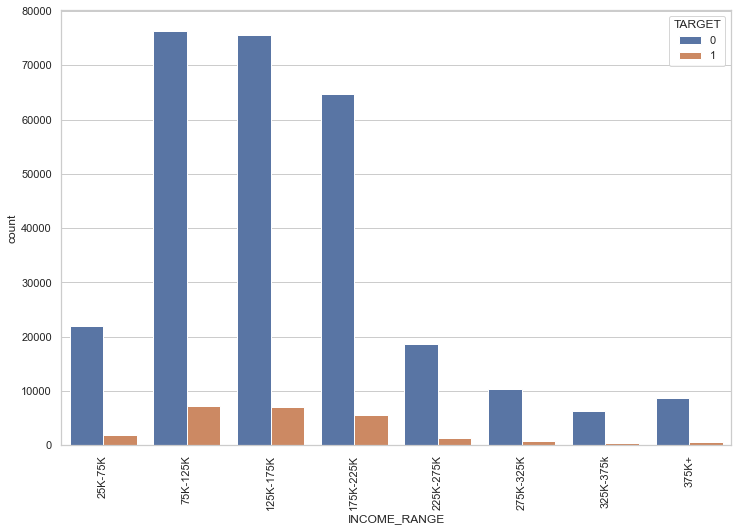

In [135]:
# Categorical variable default / paid vs whole dataset
plt.figure(figsize=(12,8))
sns.countplot(x='INCOME_RANGE',hue="TARGET",data=current_app_df)
plt.xticks(rotation=90)
plt.show()

> As we can see, majority of the applicants lie in the income range of 75,000 - 225000, with the maximum being in the range of 75000 - 125000 (26 %)

### Understanding occupation type , income type , and organization type of applicants and there distributions

* Another variable that seems to be important is the **income type**. Maybe people who are salaried in jobs would have higher probability of repayment vs people who are running a business.

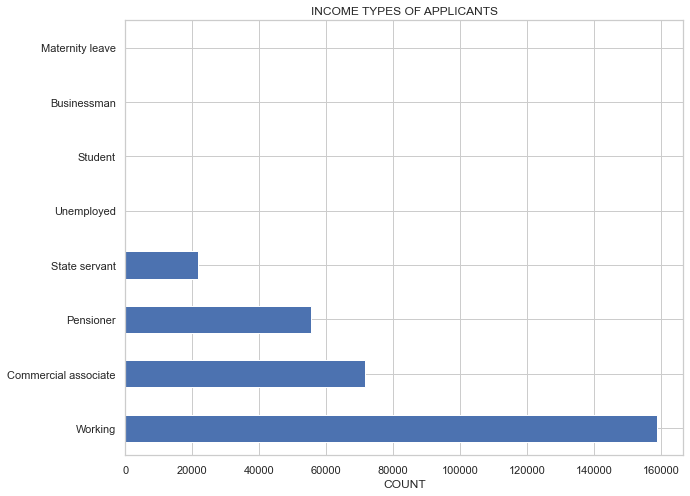

In [31]:
plt.figure(figsize=(10,8))
current_app_df['NAME_INCOME_TYPE'].value_counts().plot.barh()
plt.title('INCOME TYPES OF APPLICANTS')
plt.xlabel('COUNT')
plt.show()

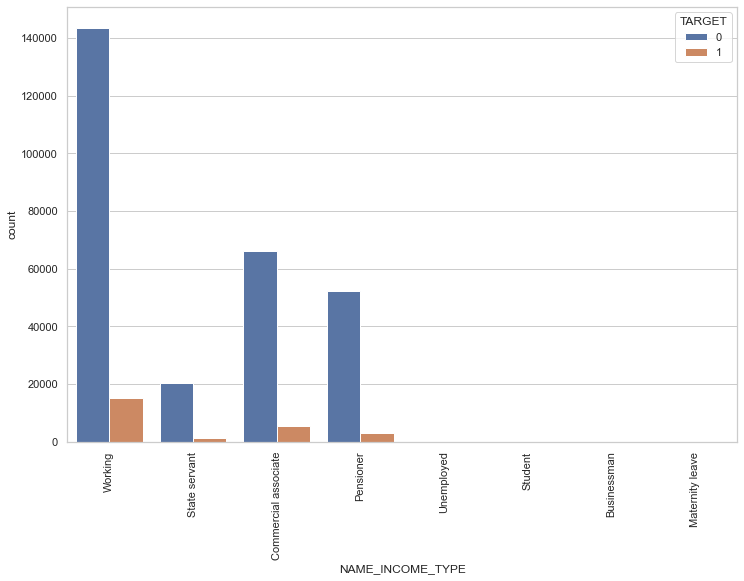

In [149]:
# Categorical variable default / paid vs whole dataset INCOME TYPE
plt.figure(figsize=(12,8))
sns.countplot(x='NAME_INCOME_TYPE',hue="TARGET",data=current_app_df)
plt.xticks(rotation=90)
plt.show()

* Here is the **occupation type** of applicants

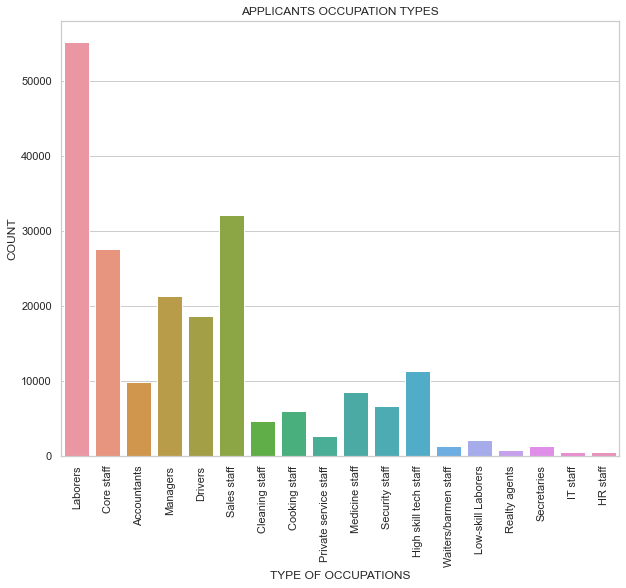

In [70]:
plt.figure(figsize=(10,8))
chart = sns.countplot(current_app_df['OCCUPATION_TYPE'])
plt.title('APPLICANTS OCCUPATION TYPES')
plt.ylabel('COUNT')
plt.xlabel('TYPE OF OCCUPATIONS')
plt.setp(chart.get_xticklabels(), rotation=90)  # Rotate labels
plt.show()


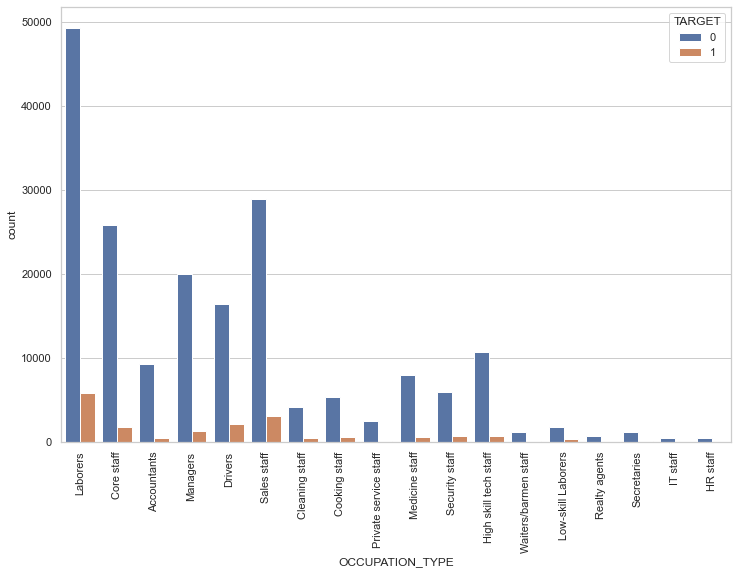

In [150]:
# Categorical variable default / paid vs whole dataset INCOME TYPE
plt.figure(figsize=(12,8))
sns.countplot(x='OCCUPATION_TYPE',hue="TARGET",data=current_app_df)
plt.label()
plt.xticks(rotation=90)
plt.show()

* Different **organization types** of the applicants

In [14]:
current_app_df['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

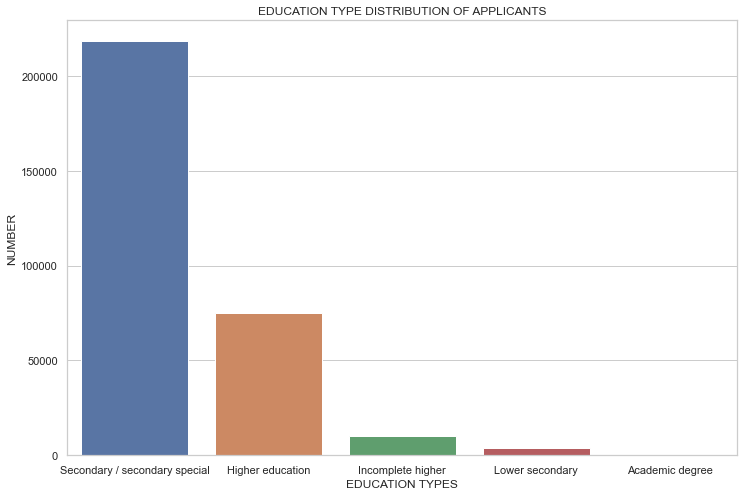

In [36]:
current_app_df['NAME_EDUCATION_TYPE'].value_counts(normalize=True)
plt.figure(figsize=(12,8))
sns.countplot(current_app_df['NAME_EDUCATION_TYPE'],orient='h')
plt.title('EDUCATION TYPE DISTRIBUTION OF APPLICANTS')
plt.xlabel('EDUCATION TYPES')
plt.ylabel('NUMBER')
plt.show()

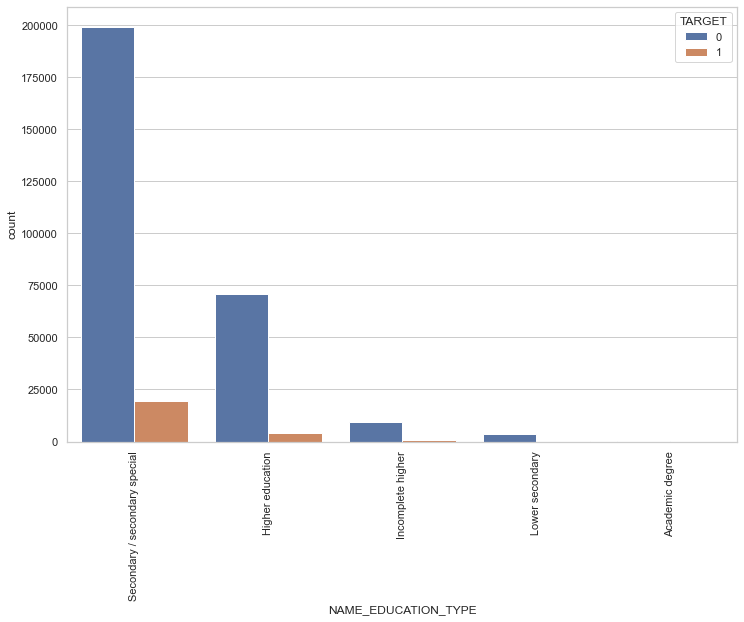

In [152]:
# Categorical variable default / paid vs whole dataset INCOME TYPE
plt.figure(figsize=(12,8))
sns.countplot(x='NAME_EDUCATION_TYPE',hue="TARGET",data=current_app_df)
plt.xticks(rotation=90)
plt.show()

**OBSERVATIONS - SUMMARY**
* It seems like the highest percentage of applicants are of the working class **51%** , with the next highest percentages going to commercial associates **23%** and pensioners **15%** .
* **26%** of applicants are laborers, **15%** are sales staff and **13%** are core staff
* 75% of applicants have Secondary / Secondary Special education with 24% bei

## Understanding the spread of the applicants age

In [154]:
# Since age is in days, we should convert it to years, Also
current_app_df['AGE_YEARS'] =  - current_app_df['DAYS_BIRTH'] // 365
current_app_df['AGE_YEARS'].describe()


count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: AGE_YEARS, dtype: float64

In [155]:
## Minimum age is 20, lets categories the age into age groups based on 5 years STEP
min_age=20
STEP = 5
bins = [min_age + i * STEP for i in range(11)]
categories=[str(x) +'-'+ str(x+STEP) for x in bins[:-1]]

# With bins and categories, define a new variable age range
current_app_df['AGE_RANGE'] = pd.cut(current_app_df['AGE_YEARS'],bins,labels=categories)




**Plotting the graph**

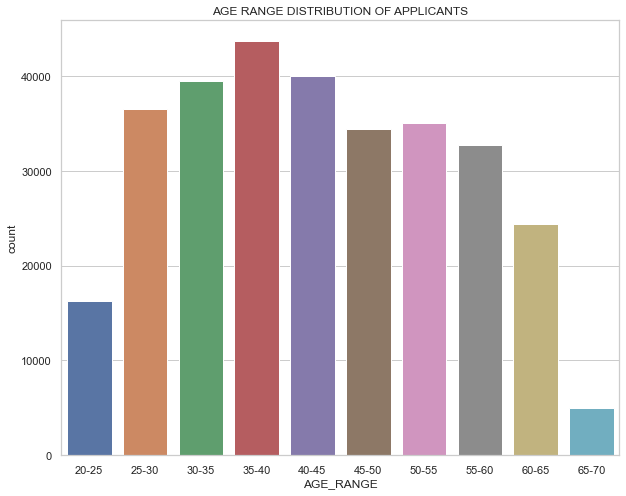

In [156]:
plt.figure(figsize=(10,8))
plt.title("AGE RANGE DISTRIBUTION OF APPLICANTS")
plt.xlabel('AGE RANGES')
plt.ylabel('COUNT')
sns.countplot(current_app_df['AGE_RANGE'])
plt.show()

**OBSERVATION - SUMMARY**

* The majority of the applicants lie in the age range of **35-40** with **40-45** and **30-35** age group being the most common

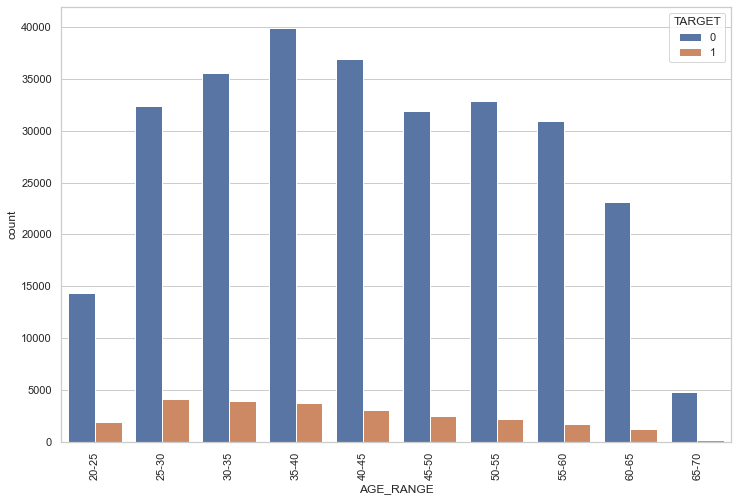

In [157]:
# Categorical variable default / paid vs whole dataset INCOME TYPE
plt.figure(figsize=(12,8))
sns.countplot(x='AGE_RANGE',hue="TARGET",data=current_app_df)
plt.xticks(rotation=90)
plt.show()

### Visualizations of other major variables ( GENDER , TYPE OF LOAN , FAMILY_STATUS , CAR OWNED, HOUSE OWNED)

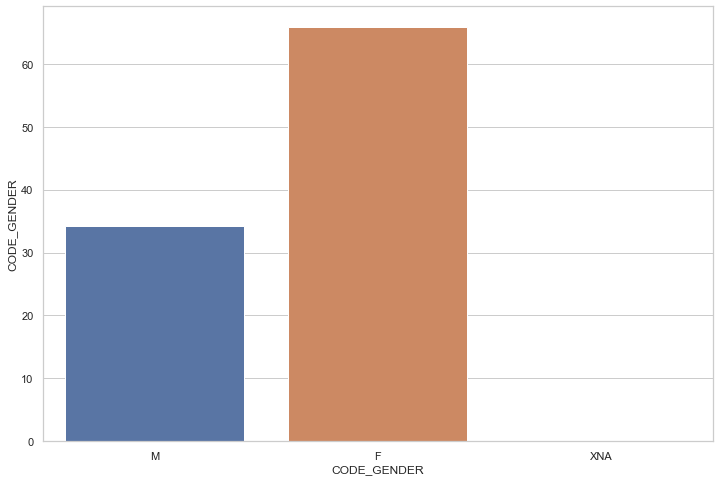

In [121]:
plt.figure(figsize=(12,8))
# fig, axs = plt.subplots(ncols=2)
current_app_df['CODE_GENDER'].value_counts()
sns.barplot(data=current_app_df,x='CODE_GENDER',y='CODE_GENDER',orient='v',estimator=lambda x: len(x) / len(current_app_df) * 100)
# sns.catplot(x=current_app_df['CODE_GENDER'],kind='count')
# plt.show()
# sns.regplot(x='value', y='wage', data=df_melt, ax=axs[1])
# sns.boxplot(x='education',y='wage', data=df_melt, ax=axs[2])
# current_app_df['GENDER']